<a href="https://colab.research.google.com/github/carmsanchezs/DSFem_Advertising_Challenge_MultipleLinearRegresion/blob/main/Inversion_Publicidad_Reg_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Fem - Reto Inversión en publicidad**

### *#INVERSIONPUBLICIDAD*

**RETO**:
Analicemos la relación entre la inversión en publicidad en televisión, periódico y radio y las ventas del producto mediante un modelo de regresión lineal múltiple. 



## Importando librerias

In [ ]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Cargando los datos y explorando la correlación entre ellos

---



In [ ]:
# cargando el archivo
dataset = pd.read_csv('dataset/advertising.csv')

In [ ]:
# 5 registros de ejemplo
dataset.sample(5)

,TV,Radio,Newspaper,Sales
4,180.8,10.8,58.4,17.9
12,23.8,35.1,65.9,9.2
75,16.9,43.7,89.4,8.7
8,8.6,2.1,1.0,4.8
128,220.3,49.0,3.2,24.7


In [ ]:
# la interpretación que obtenemos con el método info()
# 200 registros
# 4 variables
# todas las variables con de tipo numerico
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# investigando la correlación entre variables
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


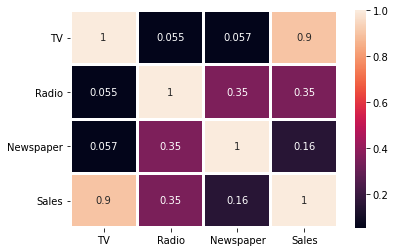

In [ ]:
# graficando la correlación
sns.heatmap(dataset.corr(), annot=True, linewidths=2)

Graficando la relación entre las variables con un diagrama de dispersión se observa que:
 - la variable que más impacta en las ventas es **TV** con correlación de **0.9**, 
 - luego **Radio** de **0.35** 
 - en menor medida **Newspaper** de **0.16**

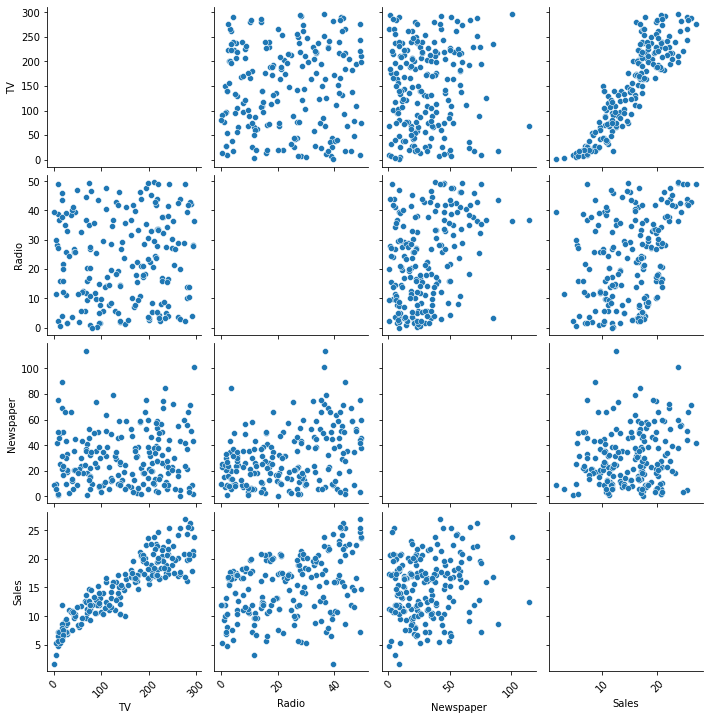

In [ ]:
# Graficando la relación entre las variables con un diagrama de dispersión
g = sns.pairplot(dataset, diag_kind='reg')
for ax in g.axes.flat:
  plt.setp(ax.get_xticklabels(), rotation=45)



```
# This is formatted as code
```

## Modelo de regresión lineal
$𝑦 = 𝐵_0𝑥0 + 𝐵_1𝑥1 + 𝐵_2𝑥2$

**Módelo propuesto**

$Sales = 𝐵_0TV + 𝐵_1Radio + 𝐵_2Newspaper$

In [ ]:
# verificamos que no existen datos nulos
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# designamos la matriz de variables independientes
X = dataset[['TV', 'Radio', 'Newspaper']]
# designamos la matriz de la variable dependiente
Y = dataset['Sales']

In [ ]:
# Comenzamos el modelo de regresión lineal
# el objetivo es obtener el error, el error cuadrático medio y los coeficientes para nuestro modelo
reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
error = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print("El error es: {}".format(error))
print("El error de r2 es: {}".format(r2))
print("Los coeficientes son: {}".format(reg.coef_))

El error es: 1.6449942697855562
El error de r2 es: 0.9025912899684558
Los coeficientes son: [0.05444578 0.10700123 0.00033566]


**Con los datos obtenidos, nuestro modelo es:**

$ Sales = 0.54TV + 0.107Radio + 0.0003Newspaper $




In [ ]:
# Haciendo una prueba con datos
TV = 300
Radio = 4
Newspaper = 8
print("Sales de predicción: {}".format(
    reg.predict([[TV, Radio, Newspaper]])
))


Sales de predicción: [21.38954836]


In [ ]:
# comparando con los datos reales
print(dataset.query('TV >= 290 and TV <= 310').sort_values('Sales'))

        TV  Radio  Newspaper  Sales
35   290.7    4.1        8.5   17.8
42   293.6   27.7        1.8   20.7
30   292.9   28.3       43.2   21.4
101  296.4   36.3      100.9   23.8


## **Conclusiones**

- **TV** es la variable que más impacta en las ventas (Sales)
- La variable que tiene un casi nulo impacto en las ventas (Sales) es Newspaper, por lo que pudo ser omitida del modelo.
- Con **TV = 300**, **Radio = 4**, **Newspaper = 8**. Tenemos **Sales = 21.39**
y revisando los datos reales para **TV** entre **290** y **310** (qué es la variable que más impacta el resultado), tenemos un valor de **Sales** de **17.8** a **23.8** 
